<a href="https://colab.research.google.com/github/Thames07/Deep-Learning-A-Visual-Approach/blob/main/Music_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Content-based filters
Recommendations done using content-based recommenders can be seen as a user-specific classification problem. This classifier learns the user's likes and dislikes from the features of the song.

The most straightforward approach is keyword matching.

In a few words, the idea behind is to extract meaningful keywords present in a song description a user likes, search for the keywords in other song descriptions to estimate similarities among them, and based on that, recommend those songs to the user.

How is this performed?

In our case, because we are working with text and words, Term Frequency-Inverse Document Frequency (TF-IDF) can be used for this matching process.

We'll go through the steps for generating a content-based music recommender system.

#### Importing required libraries

First, we'll import all the required libraries.

In [2]:
import pandas as pd
import numpy as np


In [3]:
from typing import List, Dict

We have already used the TF-IDF score before when performing Twitter sentiment analysis.

Likewise, we are going to use TfidfVectorizer from the Scikit-learn package again.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#### Dataset

This dataset contains name, artist, and lyrics for 57650 songs in English. The data has been acquired from LyricsFreak through scraping.

In [5]:
music = pd.read_csv('/content/drive/MyDrive/songdata.csv')

In [6]:
music.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


import numpy as np
from google.colab import autoviz
df_6103796430272538070 = autoviz.get_registered_df('df_6103796430272538070')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_6103796430272538070, *['song'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6103796430272538070 = autoviz.get_registered_df('df_6103796430272538070')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_6103796430272538070, *['link'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6103796430272538070 = autoviz.get_registered_df('df_6103796430272538070')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_6103796430272538070, *['text'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6103796430272538070 = autoviz.get_registered_df('df_6103796430272538070')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_6103796430272538070, *['song', 'link'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6103796430272538070 = autoviz.get_registered_df('df_6103796430272538070')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_6103796430272538070, *['link', 'text'], **{})
chart

In [25]:
import numpy as np
from google.colab import autoviz
df_6103796430272538070 = autoviz.get_registered_df('df_6103796430272538070')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_6103796430272538070, *['song', 'link'], **{})
chart

Because of the dataset being so big, we are going to resample only 5000 random songs.

In [7]:
music = music.sample(n=5000).drop('link', axis=1).reset_index(drop=True)

We can notice also the presence of \n in the text, so we are going to remove it.

In [8]:
music['text'] = music['text'].str.replace(r'\n', '')

<ipython-input-8-9bcdd0bce6a6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  music['text'] = music['text'].str.replace(r'\n', '')


After that, we use TF-IDF vectorizerthat calculates the TF-IDF score for each song lyric, word-by-word.

Here, we pay particular attention to the arguments we can specify.

In [9]:
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')

In [11]:
lyrics_matrix = tfidf.fit_transform(music['text'])

How do we use this matrix for a recommendation?

We now need to calculate the similarity of one lyric to another. We are going to use cosine similarity.

We want to calculate the cosine similarity of each item with every other item in the dataset. So we just pass the lyrics_matrix as argument.

In [12]:
cosine_similarities = cosine_similarity(lyrics_matrix)


Once we get the similarities, we'll store in a dictionary the names of the 50 most similar songs for each song in our dataset.

In [13]:
similarities = {}

In [17]:
for i in range(len(cosine_similarities)):
    # Now we'll sort each element in cosine_similarities and get the indexes of the songs.
    similar_indices = cosine_similarities[i].argsort()[:-50:-1]
    # After that, we'll store in similarities each name of the 50 most similar songs.
    # Except the first one that is the same song.
    similarities[music['song'].iloc[i]] = [(cosine_similarities[i][x], music['song'][x], music['artist'][x]) for x in similar_indices][1:]

After that, all the magic happens. We can use that similarity scores to access the most similar items and give a recommendation.

For that, we'll define our Content based recommender class.

In [18]:
class ContentBasedRecommender:
    def __init__(self, matrix):
        self.matrix_similar = matrix

    def _print_message(self, song, recom_song):
        rec_items = len(recom_song)

        print(f'The {rec_items} recommended songs for {song} are:')
        for i in range(rec_items):
            print(f"Number {i+1}:")
            print(f"{recom_song[i][1]} by {recom_song[i][2]} with {round(recom_song[i][0], 3)} similarity score")
            print("--------------------")

    def recommend(self, recommendation):
        # Get song to find recommendations for
        song = recommendation['song']
        # Get number of songs to recommend
        number_songs = recommendation['number_songs']
        # Get the number of songs most similars from matrix similarities
        recom_song = self.matrix_similar[song][:number_songs]
        # print each item
        self._print_message(song=song, recom_song=recom_song)

Now, instantiate class

In [19]:
recommedations = ContentBasedRecommender(similarities)

Then, we are ready to pick a song from the dataset and make a recommendation.

In [20]:
recommendation = {
    "song": music['song'].iloc[10],
    "number_songs": 4
}

In [21]:
recommedations.recommend(recommendation)

The 4 recommended songs for Look At Little Sister are:
Number 1:
Hey Hey by Eric Clapton with 0.844 similarity score
--------------------
Number 2:
Don't Cry No More by Wilson Pickett with 0.703 similarity score
--------------------
Number 3:
I've Got To Be Free by Scorpions with 0.649 similarity score
--------------------
Number 4:
Good Morning Girl by David Bowie with 0.633 similarity score
--------------------


And we can pick another random song and recommend again:

In [23]:
recommendation2 = {
    "song": music['song'].iloc[120],
    "number_songs": 4
}

In [24]:
recommedations.recommend(recommendation2)

The 4 recommended songs for The Lucky One are:
Number 1:
I Feel Lucky by Pat Benatar with 0.611 similarity score
--------------------
Number 2:
Time After Time by The Temptations with 0.464 similarity score
--------------------
Number 3:
Lucky One by Alison Krauss with 0.44 similarity score
--------------------
Number 4:
I'll Be Lucky Someday by Glen Campbell with 0.408 similarity score
--------------------


Prepare the data
We have explored this data before. We know that a user listens to an average of 26 songs. Let's answer one question before continuing.

How many users listen to the same song on average?

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
song_user = music.groupby('song')['artist'].count()

<ipython-input-31-d3a346fed204>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(song_user.values, color='blue')


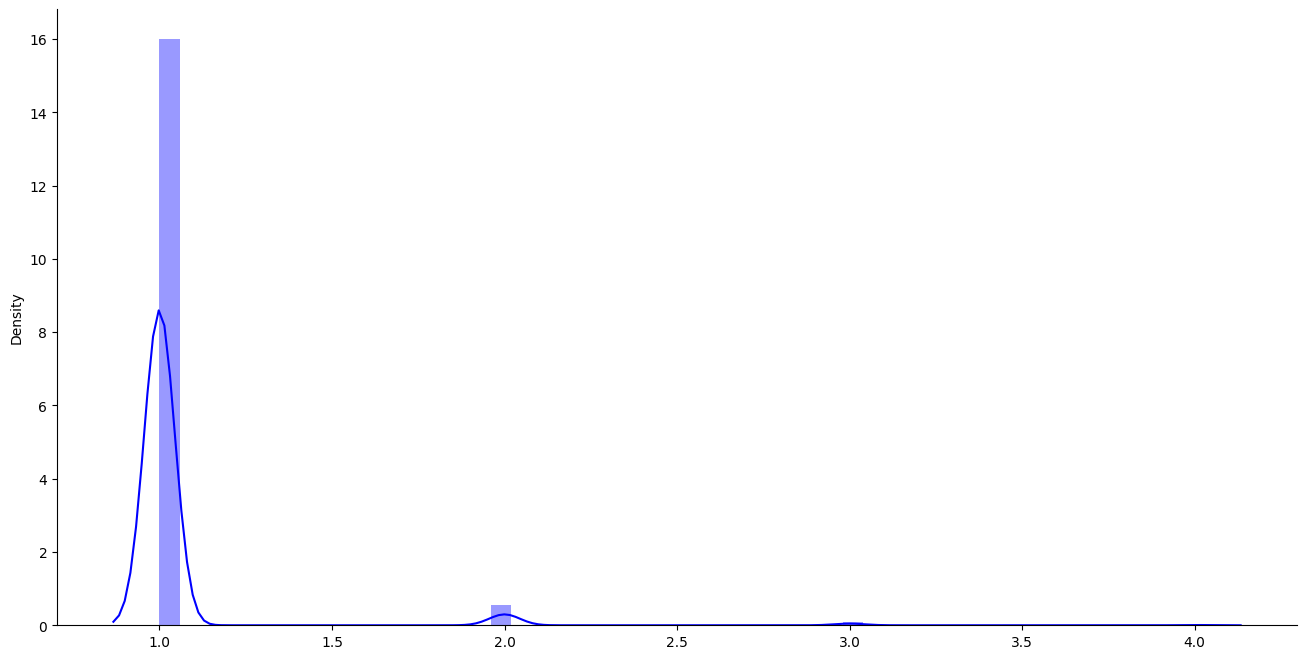

In [31]:
plt.figure(figsize=(16, 8))
sns.distplot(song_user.values, color='blue')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [32]:
print(f"A song is listened for an average of {np.mean(song_user)} users, with minimum {np.min(song_user)} and maximum {np.max(song_user)} users")


A song is listened for an average of 1.0458063166701528 users, with minimum 1 and maximum 4 users


In [34]:
# Get how many songs each user have listened to
user_counts = music.groupby('song')['artist'].count()

# Filter users which have listen to at least 16 songs
user_ten_id = user_counts[user_counts > 16].index.to_list()

In [35]:
# Get how many user have listened to each song
song_counts = music.groupby('song')['artist'].count()

# Get songs which have been listened at least 4 times
song_ten_id = song_counts[song_counts > 200].index.to_list()

In [36]:
# Filtered the dataset to keep only those users with more than 16 listened
df_song_reduced = music[(music['artist'].isin(user_ten_id)) & (music['song'].isin(song_ten_id))].reset_index(drop=True)

In [37]:
df_song_reduced.shape

(0, 3)

#### Model and recommendations

Matrix Factorization is a powerful way to implement a recommendation system. The idea behind it is to represent users and items in a lower-dimensional latent space.

So, in other words, Matrix factorization methods decompose the original sparse user-item matrix into lower dimensionality less sparse rectangular matrices with latent features.

This does not only solve the sparsity issue but also makes the method scalable. It doesn't matter how big the matrix is, you can always find lower dimensionality matrices that are a true representation of the original one.

Among the different matrix factorization techniques, we found the popular singular value decomposition (SVD).

This can be an abstract concept as we deepen into the mathematical foundations. But we'll try to keep it as simple as possible. Imagine we have a matrix A that contains the data for n users x m songs. This matrix can be decomposed uniquely into 3 matrices; let's called them U, S, and V.

In terms of our song recommender:

U is an n users x r user-latent feature matrix
V is an m songs x r song-latent feature matrix
S is an r x r non-negative diagonal matrix containing the singular values of the original matrix.
Instead of working with the implicit rating as it is, we'll apply the binning technique.

We'll define 10 categories. The original data values which fall into the interval from 0 to 1, will be replaced by the representative rating of 1; if they fall into the interval 1 to 2, they will be replaced by 2; and so on and so forth. The last category will be assigned to original values ranging from 9 to 2213.

In [38]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 2214]

In [45]:
df_song_reduced['song'] = pd.cut(df_song_reduced['song'], bins=bins, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


In [46]:
listen_counts = pd.DataFrame(df_song_reduced.groupby('song').size(), columns=['count']).reset_index(drop=False)

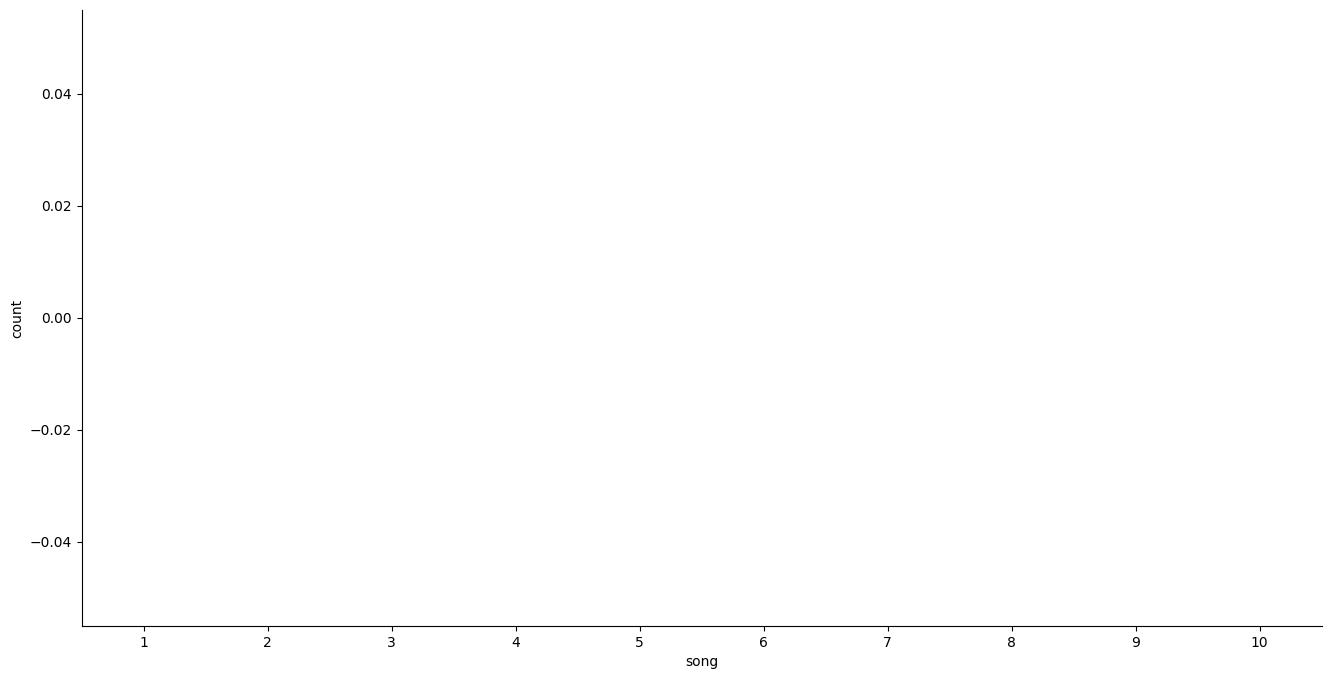

In [47]:
plt.figure(figsize=(16, 8))
sns.barplot(x='song', y='count', palette='Set3', data=listen_counts)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();